## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

## load data and have a glimpse of the data

In [2]:
#load data
shooting=pd.read_csv('shootings.csv')

In [3]:
#shape of the data
shooting.shape

(4895, 15)

In [4]:
#take of glimpse of the data
shooting.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


## Descriptive statistics of the data

In [5]:
shooting.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [6]:
shooting.drop(['date'],1).describe(include='all')

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895.000000,4895,4895,4895,4895.000000,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,NaN,4851,2,89,NaN,2,6,2288,51,2,3,4,2,12
top,NaN,TK TK,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,NaN,29,4647,2755,NaN,4673,2476,78,701,3792,3160,3073,4317,2764
mean,2902.148519,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1683.467910,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1441.500000,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2847.000000,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4352.500000,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**From the descriptive statistics , you will observe that:** 
- There  are duplicate names in the race columns 
- White people were mostly affected by Police shooting
- We also see that a six years old child was killed.
- We also see an aged peron was killed(91 years)


In [7]:
#oldest victim
shooting.loc[shooting['age'].idxmax()]

id                                    2407
name                       Frank W. Wratny
date                            2017-03-08
manner_of_death                       shot
armed                                  gun
age                                     91
gender                                   M
race                                 White
city                        Union Township
state                                   PA
signs_of_mental_illness              False
threat_level                        attack
flee                           Not fleeing
body_camera                          False
arms_category                         Guns
Name: 2071, dtype: object

In [8]:
#youngest victim
shooting.loc[shooting['age'].idxmin()]

id                                   980
name                       Jeremy Mardis
date                          2015-11-03
manner_of_death                     shot
armed                            unarmed
age                                    6
gender                                 M
race                               White
city                          Marksville
state                                 LA
signs_of_mental_illness            False
threat_level                       other
flee                                 Car
body_camera                         True
arms_category                    Unarmed
Name: 811, dtype: object

## Exploratory Data Analysis

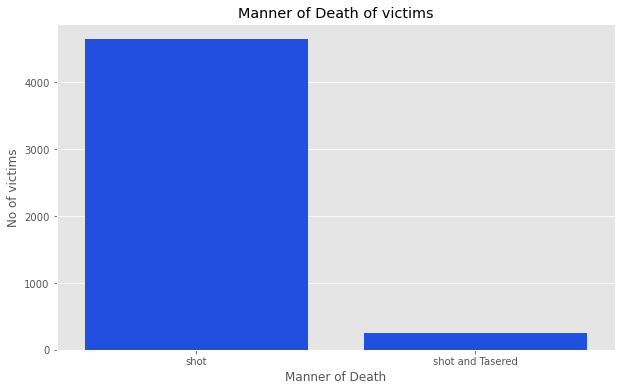

In [9]:
#How did they die?
plt.style.use("ggplot")
man_order=shooting.manner_of_death.value_counts().index
plt.figure(figsize = (10,6))
color=sns.color_palette("bright")[0]
sns.countplot(data=shooting,x='manner_of_death',order=man_order,color=color);
plt.ylabel('No of victims')
plt.xlabel('Manner of Death');
plt.title('Manner of Death of victims');


- Most victims were shot at first instance

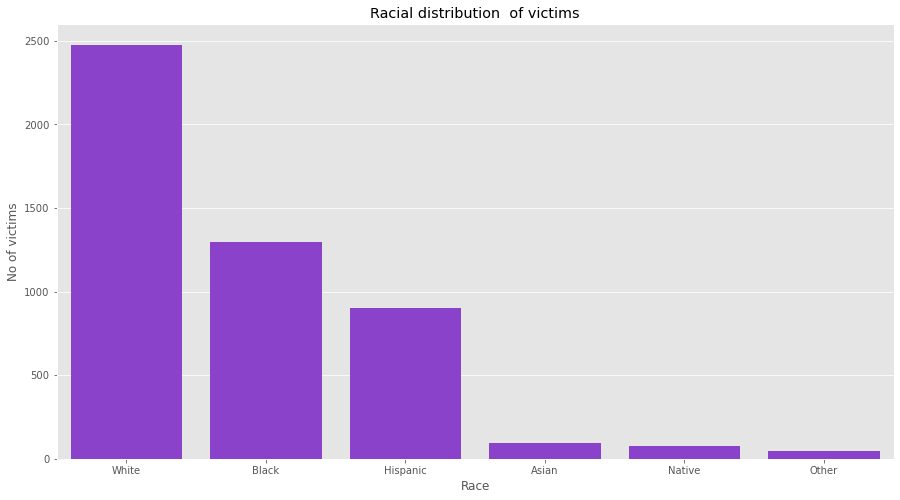

In [10]:
#What is the racial distribution of victims like? Are the shootings targeted ata a particulr race?
plt.style.use("ggplot")
race_order=shooting.race.value_counts().index
plt.figure(figsize = (15,8))

color=sns.color_palette("bright")[4]
sns.countplot(data=shooting,x='race',order=race_order,color=color);
plt.ylabel('No of victims')
plt.xlabel('Race');
plt.title('Racial distribution  of victims');

In [11]:
black=shooting[shooting['race']=='Black']
white=shooting[shooting['race']=='White']

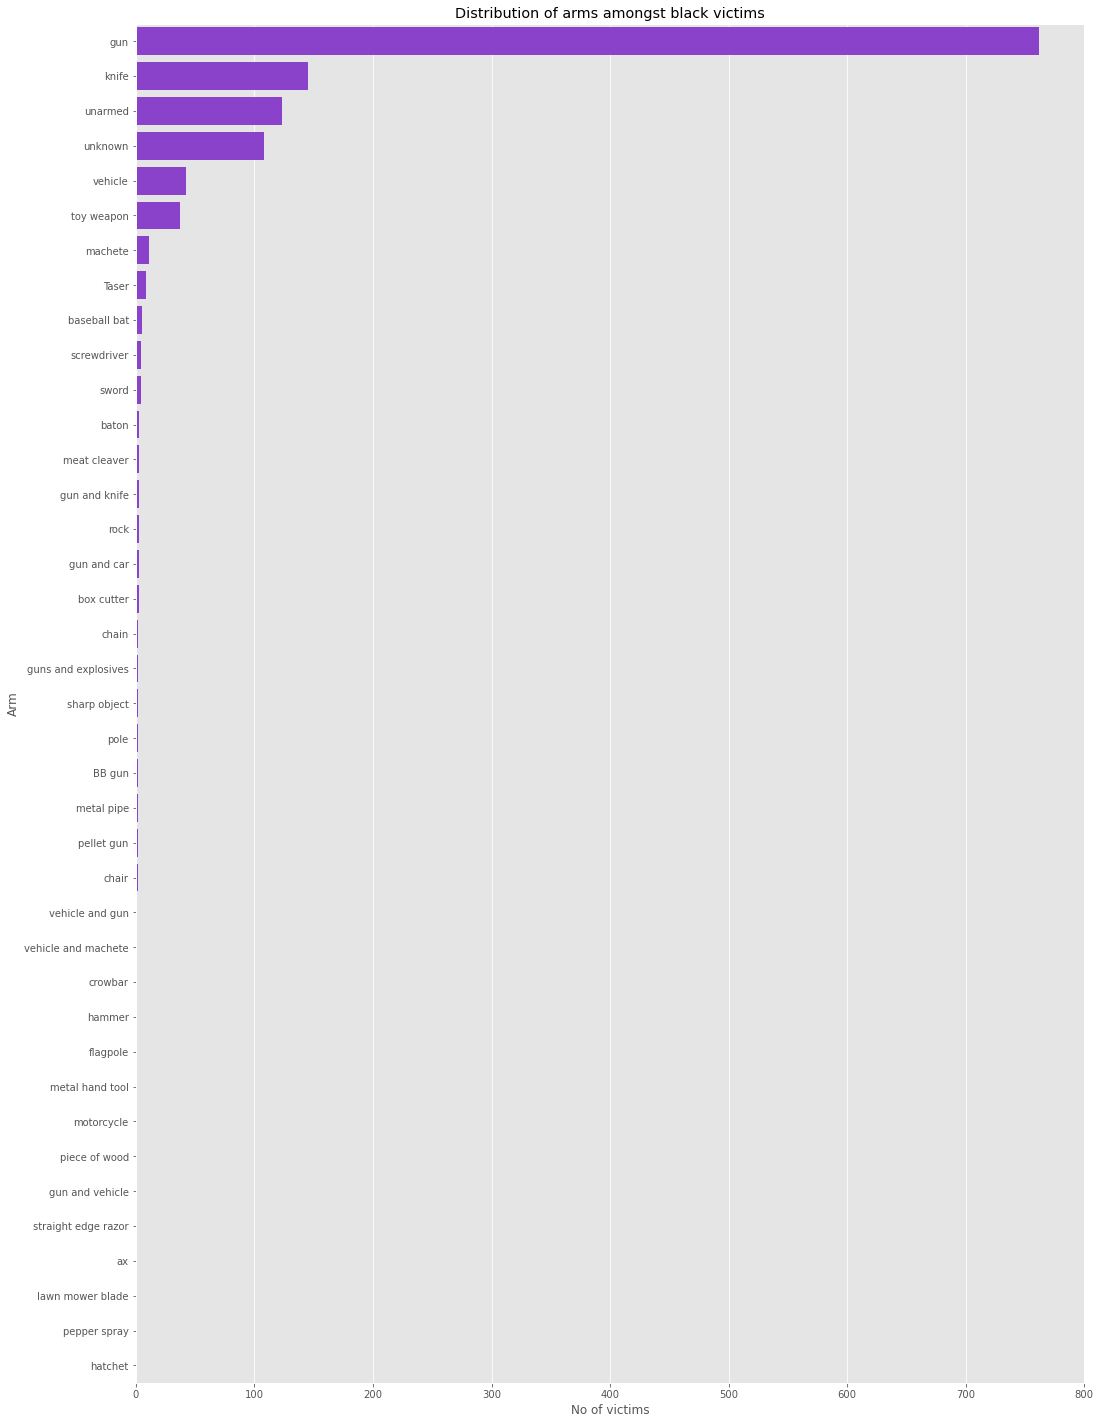

In [12]:
#wHAT KIND OF WAEPONS DID THEY POSSESS?
plt.style.use("ggplot")
plt.figure(figsize=(17,25))
bl_armed_order=black.armed.value_counts().index

color=sns.color_palette("bright")[4]
sns.countplot(data=black,y='armed',order=bl_armed_order,color=color);
plt.ylabel('Arm')
plt.xlabel('No of victims');
plt.title('Distribution of arms amongst black victims');

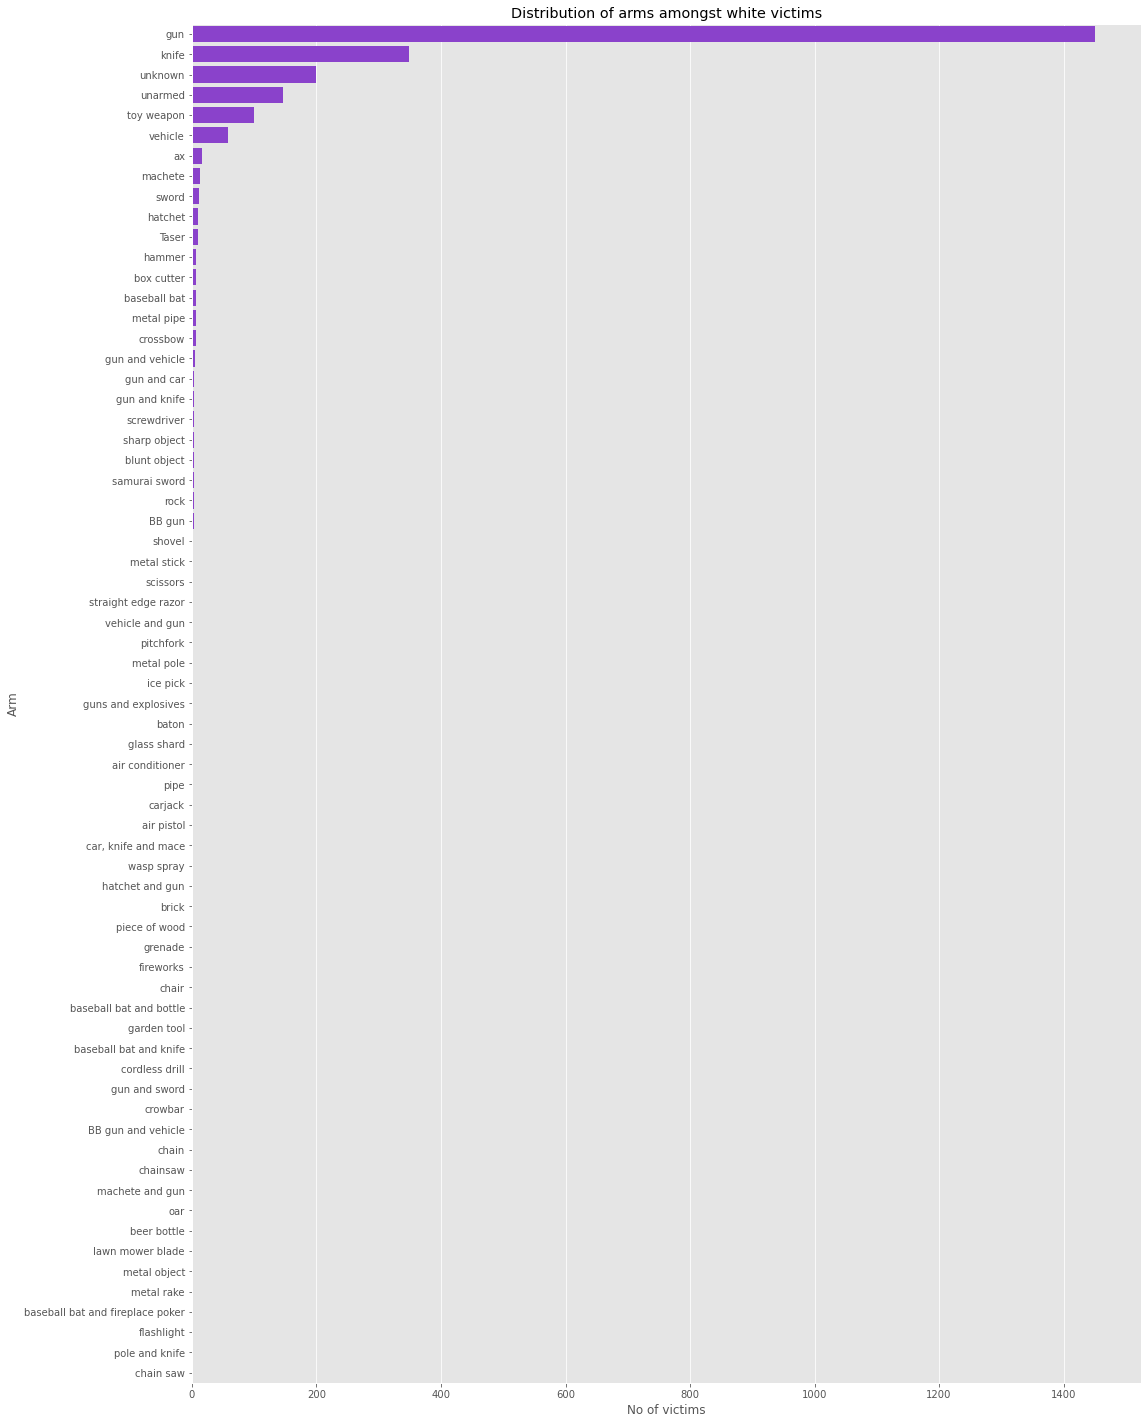

In [13]:
#What ikind of waepons did they posses?

plt.style.use("ggplot")
plt.figure(figsize=(17,25))
wh_armed_order=white.armed.value_counts().index

color=sns.color_palette("bright")[4]
sns.countplot(data=white,y='armed',order=wh_armed_order,color=color);
plt.ylabel('Arm')
plt.xlabel('No of victims');
plt.title('Distribution of arms amongst white victims');

 - Majority of victims killed so far are whites as opposed to popular opinion

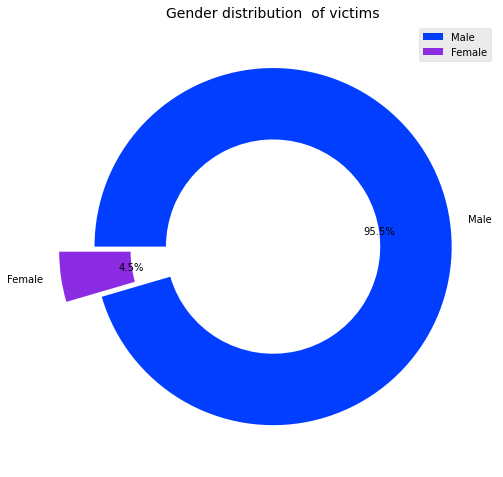

In [14]:
#What is the gender distribution of victims like?
plt.style.use("ggplot")
plt.figure(figsize=(8,12))
gen_order=shooting.gender.value_counts().index
color=[sns.color_palette("bright")[0],sns.color_palette("bright")[4]]
explode = [0, 0.2]


plt.pie(shooting.gender.value_counts(),labels=['Male','Female'], startangle=180,counterclock =False, explode = explode, wedgeprops = {'width' : 0.4},autopct='%1.1f%%',colors=color);

plt.title('Gender distribution  of victims',fontsize = 14);

plt.legend();


- 95.5 Percent of the victims are Male. More males have been killed over the years than females by Police shooting

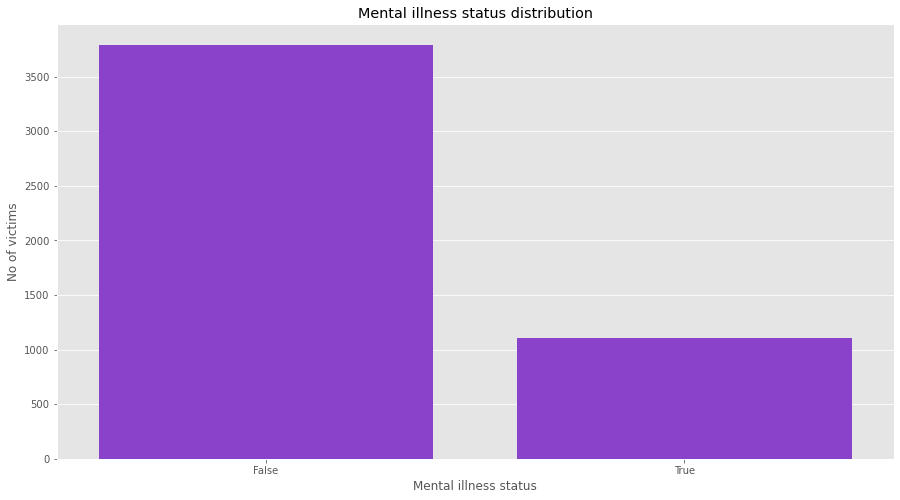

In [15]:
#Did they show any mental illness?

plt.style.use("ggplot")
plt.figure(figsize = (15,8))
men_order=shooting.signs_of_mental_illness.value_counts().index
color=sns.color_palette("bright")[4]
sns.countplot(data=shooting,x='signs_of_mental_illness',order=men_order,color=color);
plt.ylabel('No of victims')
plt.xlabel('Mental illness status');
plt.title('Mental illness status distribution');

- Most victims had sound mental health

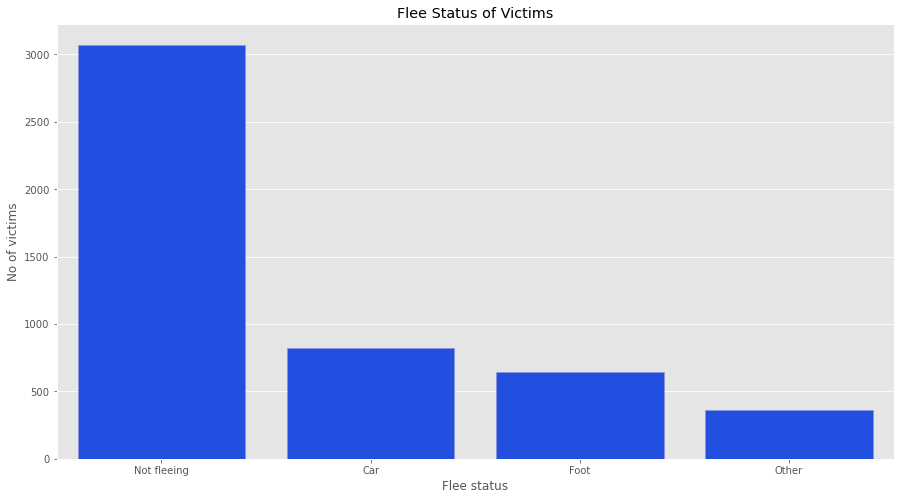

In [16]:
#Did the victims try to flee?
plt.style.use("ggplot")
plt.figure(figsize = (15,8))
flee_order=shooting.flee.value_counts().index
color=sns.color_palette("bright")[0]
sns.countplot(data=shooting,x='flee',edgecolor=sns.color_palette()[2],order=flee_order,color=color);
plt.ylabel('No of victims')
plt.xlabel('Flee status');
plt.title('Flee Status of Victims');

- Most victims were not fleeing then why did the Police shoot? were they trying to attack? or did they carry a dangerous weapon

In [17]:
not_fleeing=shooting[shooting['flee']=='Not fleeing']

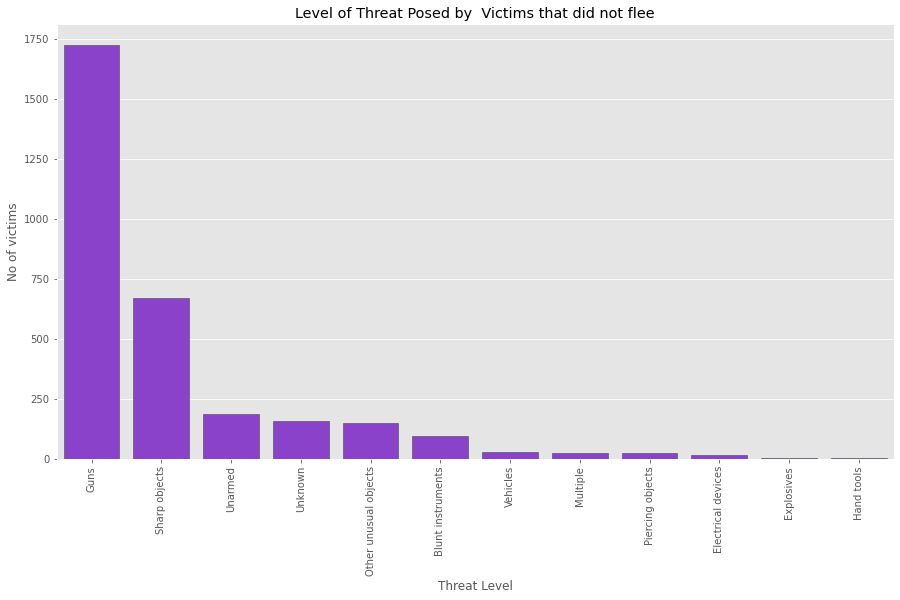

In [18]:

threat_order=not_fleeing.arms_category.value_counts().index

color=sns.color_palette("bright")[4]
plt.figure(figsize = (15,8))
sns.countplot(x=not_fleeing.arms_category,edgecolor=sns.color_palette("dark")[7],order=threat_order,color=color);
plt.ylabel('No of victims')
plt.xlabel('Threat Level');
plt.xticks(rotation=90)

plt.title('Level of Threat Posed by  Victims that did not flee');

In [19]:
nflee_unarmed=not_fleeing[not_fleeing['arms_category']=='Unarmed']
x= nflee_unarmed[nflee_unarmed['body_camera']==False]

In [20]:
nflee_unarmed.shape,x.shape

((187, 15), (162, 15))

187 victim were not trying to flee arrest and where unarmed , why did the Police still shoot at them?

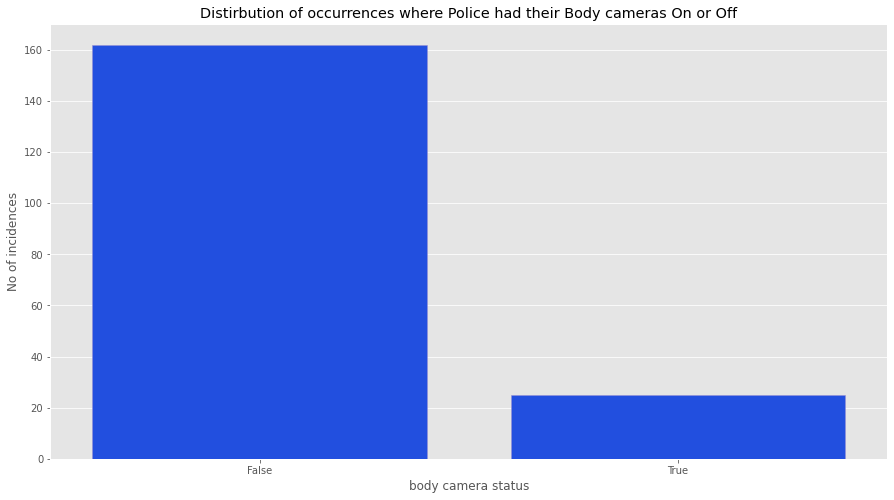

In [21]:
#Did the Police have their Body camera on in every case?
plt.style.use("ggplot")
flee_order=nflee_unarmed.body_camera.value_counts().index
plt.figure(figsize = (15,8))
color=sns.color_palette("bright")[0]
sns.countplot(data=nflee_unarmed,x='body_camera',edgecolor=sns.color_palette()[2],order=flee_order,color=color);
plt.ylabel('No of incidences')
plt.xlabel('body camera status');
plt.title('Distirbution of occurrences where Police had their Body cameras On or Off');

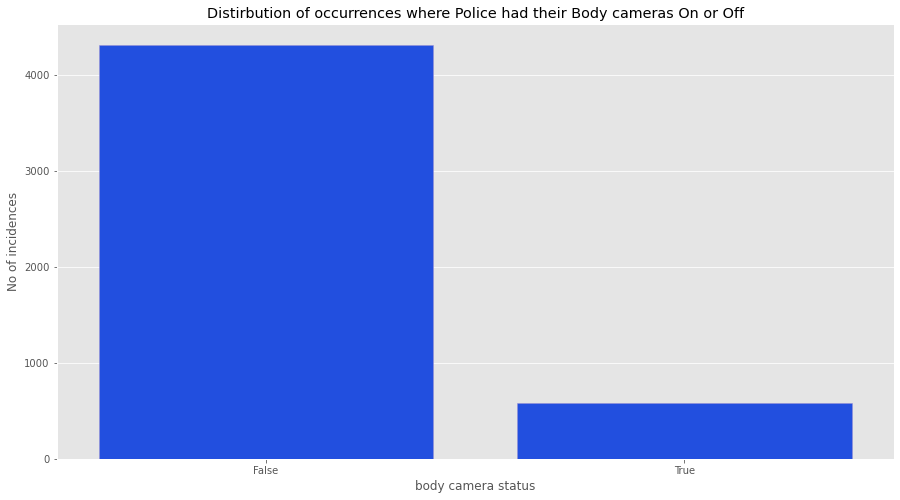

In [22]:
#Did the Police have their Body camera on in every case?
plt.style.use("ggplot")
flee_order=shooting.body_camera.value_counts().index
plt.figure(figsize = (15,8))
color=sns.color_palette("bright")[0]
sns.countplot(data=shooting,x='body_camera',edgecolor=sns.color_palette()[2],order=flee_order,color=color);
plt.ylabel('No of incidences')
plt.xlabel('body camera status');
plt.title('Distirbution of occurrences where Police had their Body cameras On or Off');

- Majority of Police involved in the shootings did not have body camera on

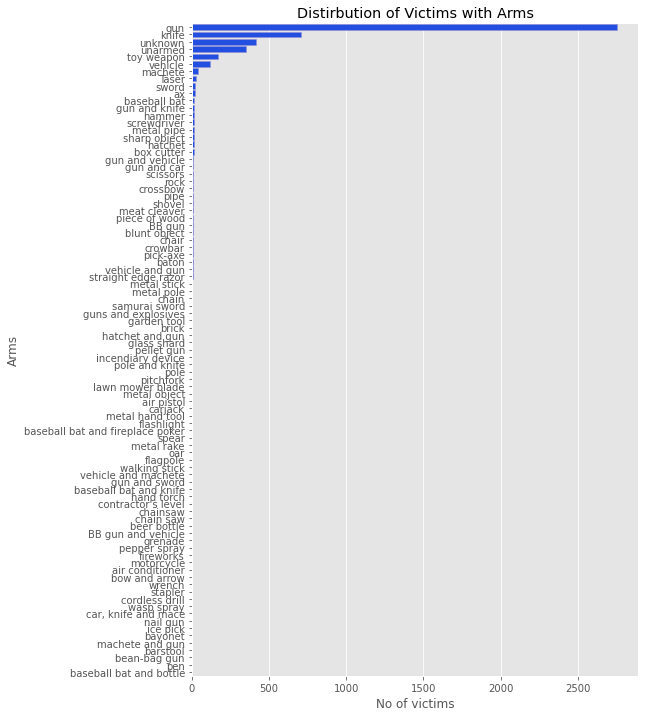

In [23]:

#Were the victims armed during the incident?
plt.style.use("ggplot")

plt.figure(figsize=(8,12))
arms_order=shooting.armed.value_counts().index
color=sns.color_palette("bright")[0]
sns.countplot(data=shooting,y='armed',edgecolor=sns.color_palette()[2],order=arms_order,color=color);
plt.ylabel('Arms')
plt.xlabel('No of victims');
plt.title('Distirbution of Victims with Arms');

- Most victims were armed , a great numbers of them were with guns

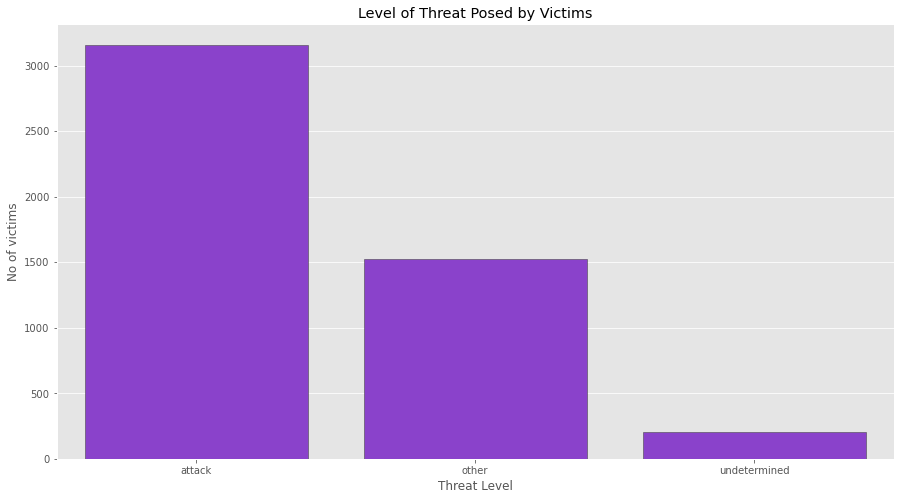

In [24]:
#What level of Threat did the victim pose?

threat_order=shooting.threat_level.value_counts().index

color=sns.color_palette("bright")[4]
plt.figure(figsize = (15,8))
sns.countplot(x=shooting.threat_level,edgecolor=sns.color_palette("dark")[7],order=threat_order,color=color);
plt.ylabel('No of victims')
plt.xlabel('Threat Level');

plt.title('Level of Threat Posed by Victims');



In [25]:
attack= shooting[shooting['threat_level']=='attack']

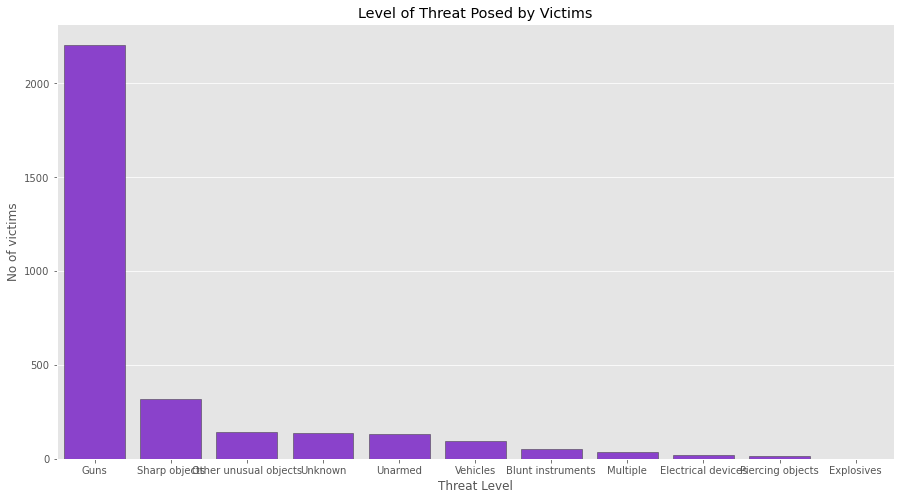

In [26]:
#What level of Threat did the victim pose?

threat_order=attack.arms_category.value_counts().index

color=sns.color_palette("bright")[4]
plt.figure(figsize = (15,8))
sns.countplot(x=attack.arms_category,edgecolor=sns.color_palette("dark")[7],order=threat_order,color=color);
plt.ylabel('No of victims')
plt.xlabel('Threat Level');

plt.title('Level of Threat Posed by Victims');



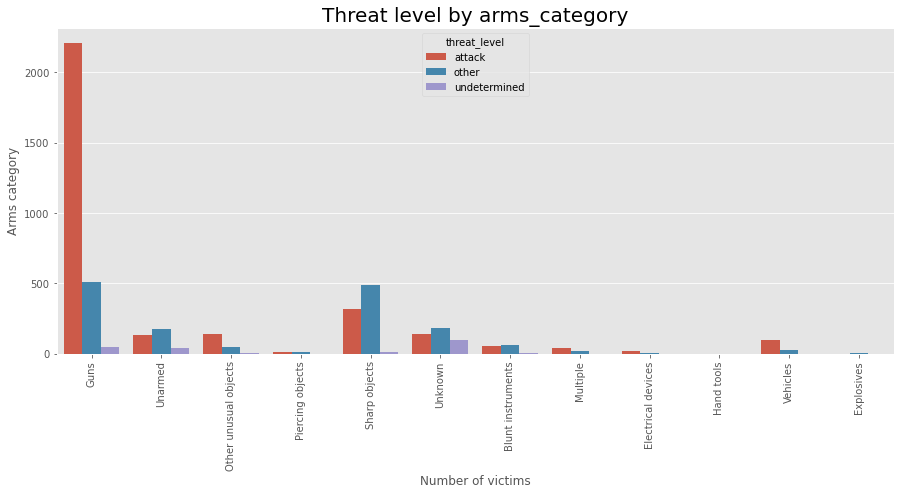

In [27]:
plt.figure(figsize = (15,6))
plt.style.use("ggplot")
sns.countplot(data=shooting,x="arms_category",hue='threat_level')
plt.xlabel('Number of victims')
plt.ylabel('Arms category');
plt.title('Threat level by arms_category',fontsize = 20);
plt.xticks(rotation=90);

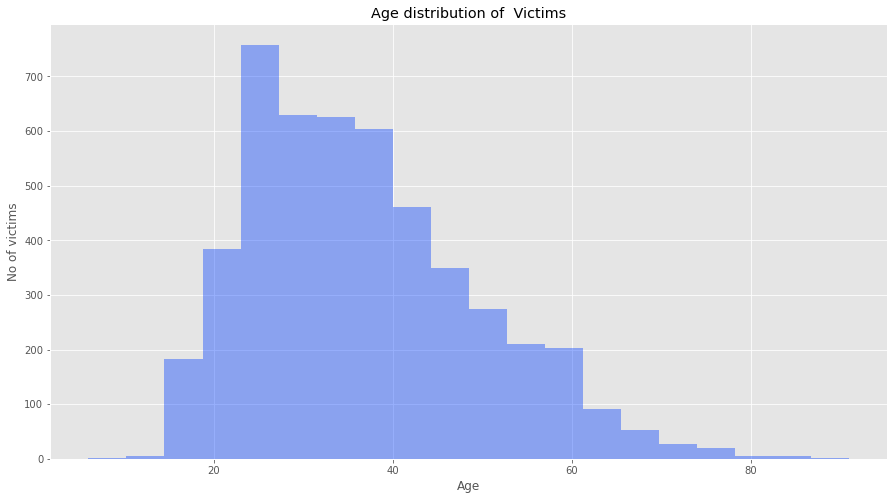

In [28]:
#what is the age distribution of the victims?


threat_order=shooting.threat_level.value_counts().index
plt.figure(figsize = (15,8))
color=sns.color_palette("bright")[0]
sns.distplot(shooting.age,color=color,bins=20
             ,kde=False);
plt.ylabel('No of victims')
plt.xlabel('Age');
plt.title('Age distribution of  Victims');



In [29]:
child = shooting[shooting['age']<13]
child.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
811,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,White,Marksville,LA,False,other,Car,True,Unarmed
988,1165,Ciara Meyer,2016-01-11,shot,unarmed,12.0,F,White,Penn Township,PA,False,other,Not fleeing,False,Unarmed
2761,3229,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,White,Schertz,TX,False,other,Not fleeing,False,Unarmed


In [30]:
#what age group do the victims fall under? are they children, teenagers, youngadults, middle-aged, or old?
shooting["age_groups"] = pd.cut(shooting["age"],bins=[0,12, 19, 40, 70, np.inf],labels=["child", "teenager", "young adult", "middleaged","old"])

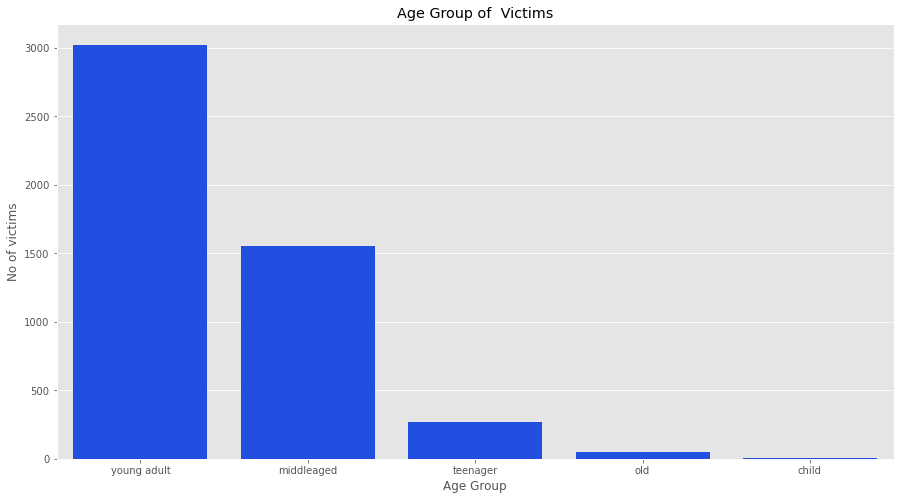

In [31]:
plt.figure(figsize = (15,8))
sns.countplot(shooting["age_groups"],color=color, order=shooting["age_groups"].value_counts().index);
plt.ylabel('No of victims')

plt.xlabel('Age Group');
plt.title('Age Group of  Victims');

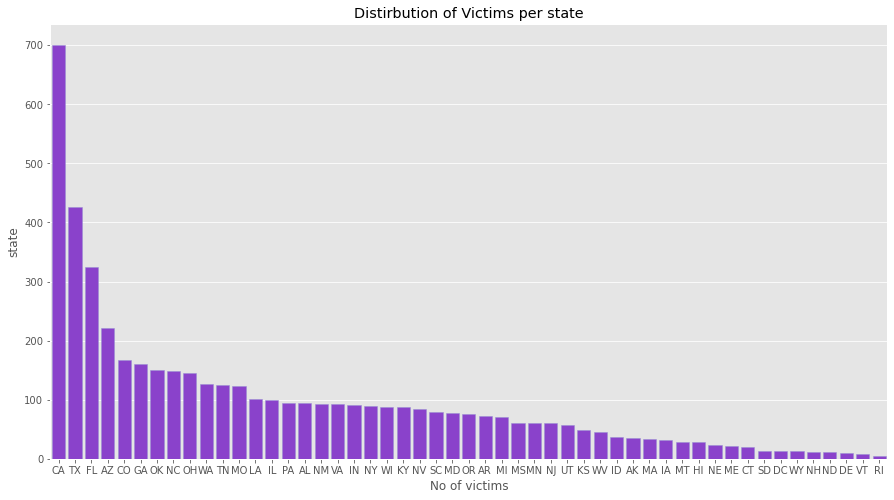

In [32]:
#Which state  has the most incident of Police shooting?
plt.style.use("ggplot")
plt.figure(figsize = (15,8))
state_order=shooting.state.value_counts().index
color=sns.color_palette("bright")[4]

sns.countplot(data=shooting,x='state',edgecolor=sns.color_palette()[2],order=state_order,color=color);
plt.ylabel('state')
plt.xlabel('No of victims');
plt.title('Distirbution of Victims per state');

In [33]:
web = requests.get('https://www.infoplease.com/state-abbreviations-and-state-postal-codes')

dfs = pd.read_html(web.text)

ConnectionError: HTTPSConnectionPool(host='www.infoplease.com', port=443): Max retries exceeded with url: /state-abbreviations-and-state-postal-codes (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001D597F0FCD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
for df in dfs:
    print(df)


In [61]:
 pd.DatetimeIndex?

Most incidents happened in Califonia,next Texas, Florida, Arizona, and Colorado

## Are there patterns in number of victims with respect to time?

In [62]:
#converting date column from str to date
shooting['date']=pd.to_datetime(shooting['date'])
shooting['year'] = pd.DatetimeIndex(shooting['date']).year
shooting['month'] = pd.DatetimeIndex(shooting['date']).month
shooting['day'] = pd.DatetimeIndex(shooting['date']).day
shooting['month_year']= pd.to_datetime(shooting['date']).dt.to_period('M')


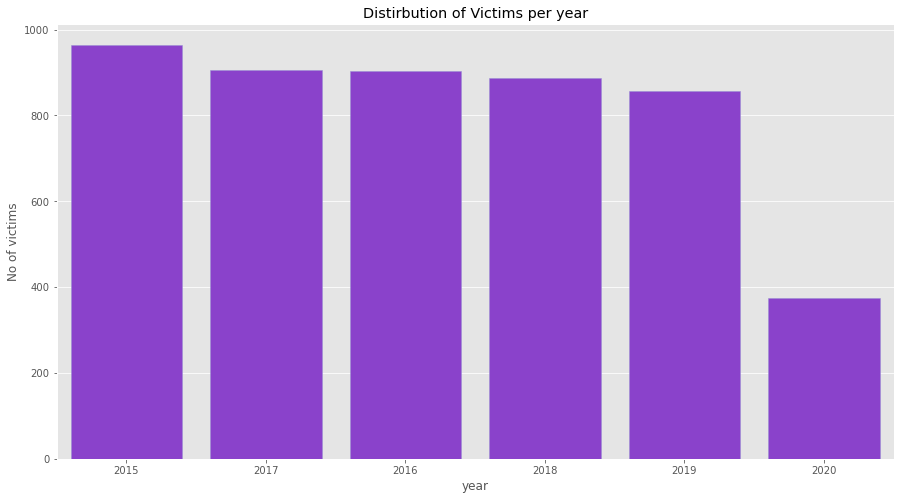

In [35]:

plt.style.use("ggplot")
plt.figure(figsize = (15,8))
year_order=shooting.year.value_counts().index
color=sns.color_palette("bright")[4]

sns.countplot(data=shooting,x='year',edgecolor=sns.color_palette()[2],order=year_order,color=color);
plt.xlabel('year')
plt.ylabel('No of victims');
plt.title('Distirbution of Victims per year');

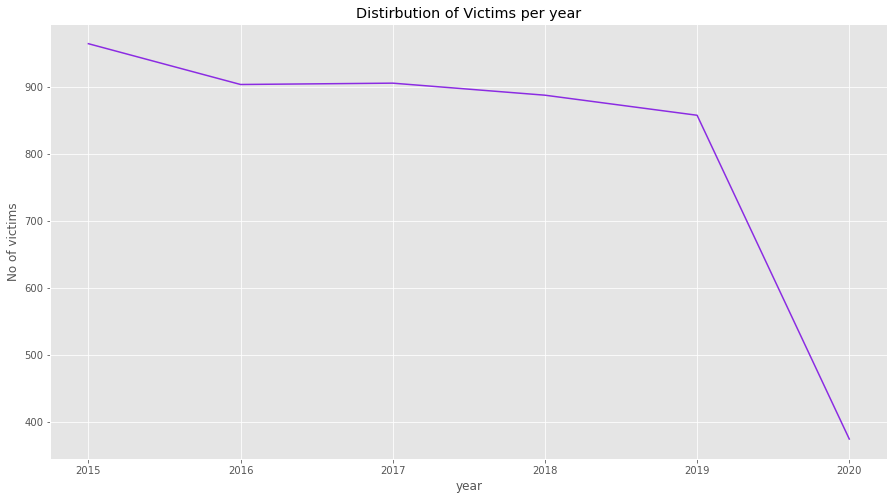

In [56]:

plt.style.use("ggplot")
plt.figure(figsize = (15,8))
year_order=shooting.year.value_counts().index
values=shooting.year.value_counts().values
color=sns.color_palette("bright")[4]

sns.lineplot(data=shooting,x=year_order,y=values,color=color);
plt.xlabel('year')
plt.ylabel('No of victims');
plt.title('Distirbution of Victims per year');

- The number of Killings did not reduce significantly until 2020

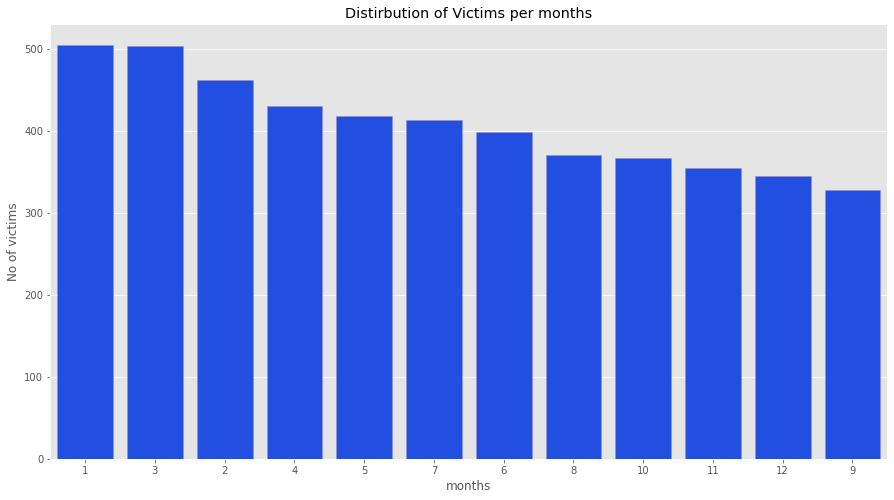

In [28]:

plt.style.use("ggplot")
plt.figure(figsize = (15,8))
month_order=shooting.month.value_counts().index
color=sns.color_palette("bright")[0]

sns.countplot(data=shooting,x='month',edgecolor=sns.color_palette()[2],order=month_order,color=color);
plt.xlabel('months')
plt.ylabel('No of victims');
plt.title('Distirbution of Victims per months');

- The first 3 months of the year recorded more victims thn other months.Is crime rate usually high early in the year?

## Racial discrimination in Police shootings

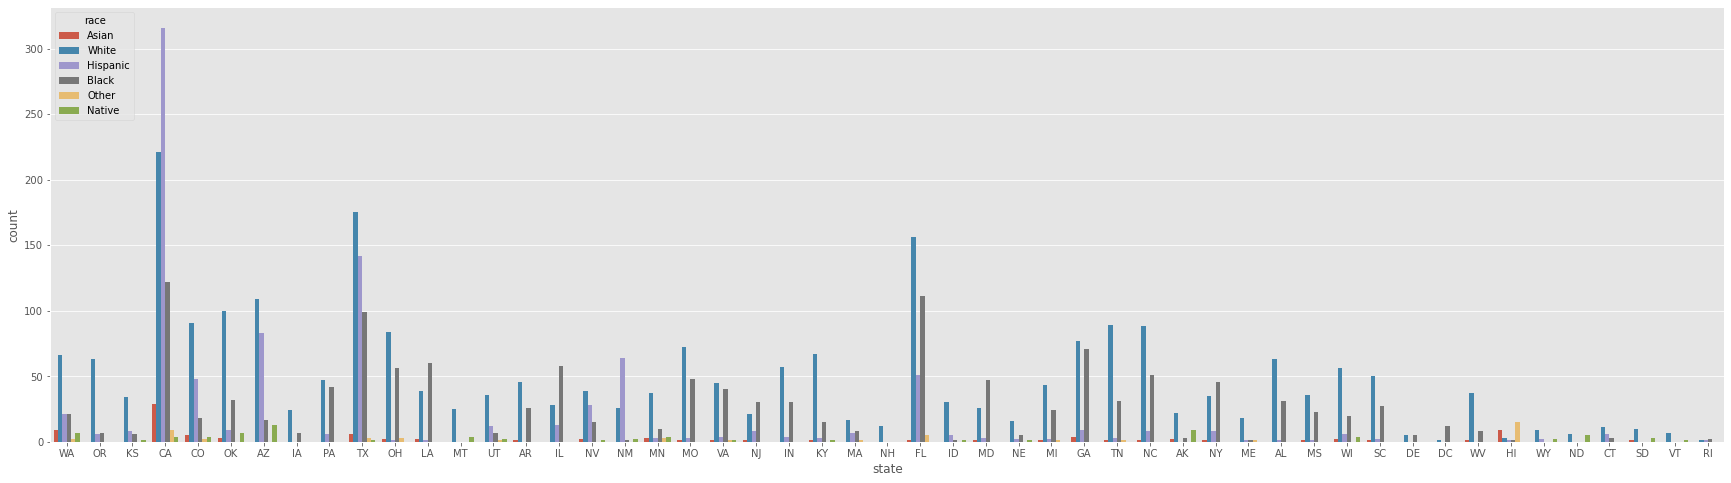

In [29]:
#Are there cetain states that had high Black cases?
plt.style.use("ggplot")
plt.figure(figsize = (30,8))
sns.countplot('state',hue='race',data=shooting);

### Most states have White victims as the most ocurring,only four states have more Black victims than white victims

In [30]:

count=shooting.groupby(['gender','race']).size()
count=count.reset_index(name='count')

count=count.pivot(index='gender',columns='race',values='count')

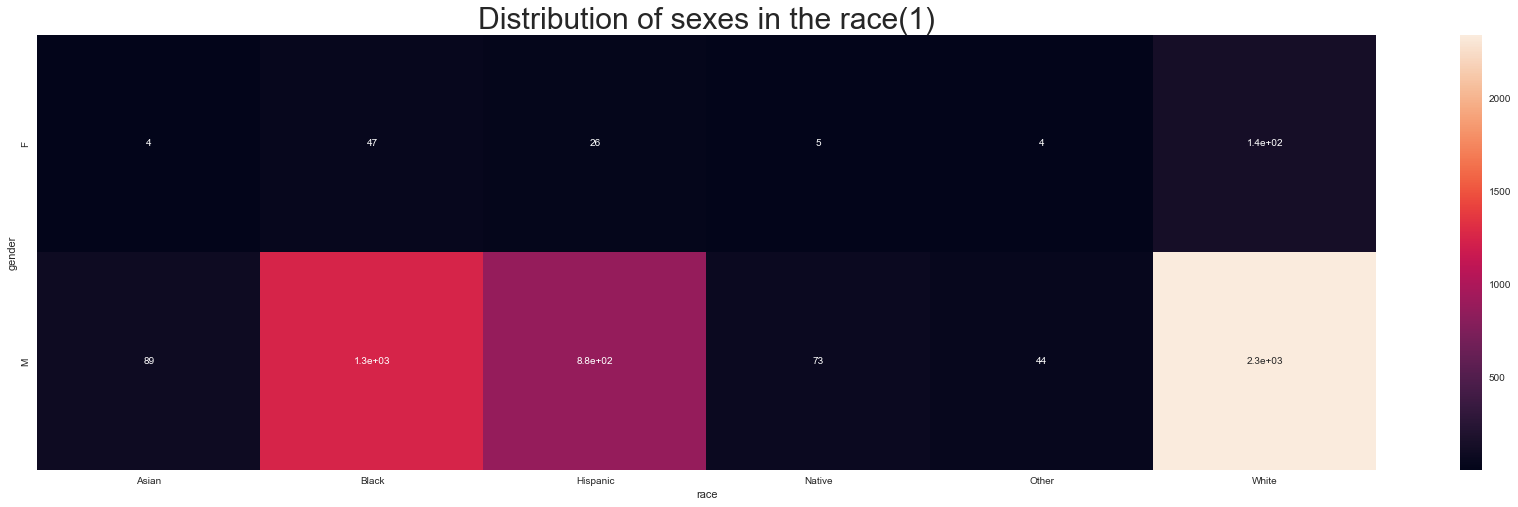

In [31]:

plt.style.use("seaborn")
plt.figure(figsize = (30,8))
sns.heatmap(count,annot=True);
plt.title('Distribution of sexes in the race(1)',fontsize = 30);

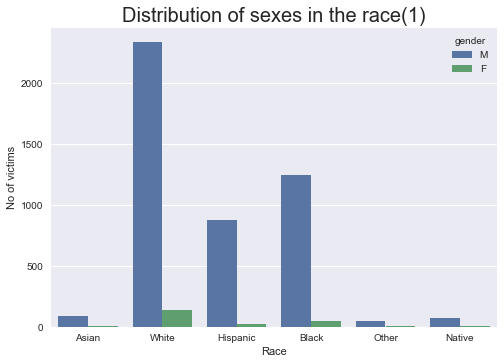

In [32]:

sns.countplot(data=shooting,x="race",hue='gender')
plt.xlabel('Race')
plt.ylabel('No of victims');
plt.title('Distribution of sexes in the race(1)',fontsize = 20);

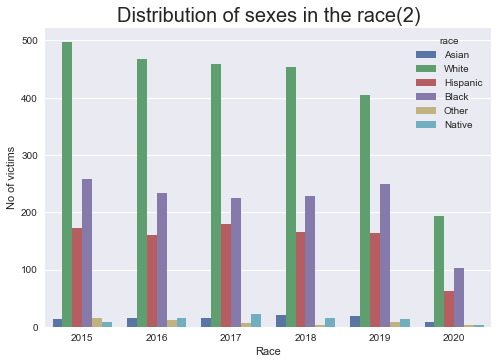

In [33]:

sns.countplot(data=shooting,x="year",hue='race')
plt.xlabel('Race')
plt.ylabel('No of victims');
plt.title('Distribution of sexes in the race(2)',fontsize = 20);

 ## why was the police quick to shoot? Are there patterns to find amongst victims that were just shot?

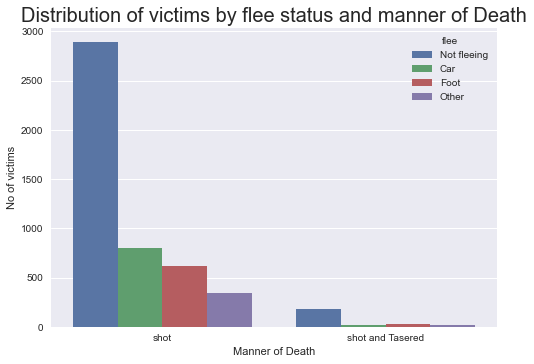

In [34]:

#Were the victims trying to flee?

sns.countplot(data=shooting,x="manner_of_death",hue='flee')
plt.xlabel('Manner of Death')
plt.ylabel('No of victims');
plt.title('Distribution of victims by flee status and manner of Death',fontsize = 20);


- Majority of victims who were shot at first instance  didnot try to escape the arrest, why did that happen?

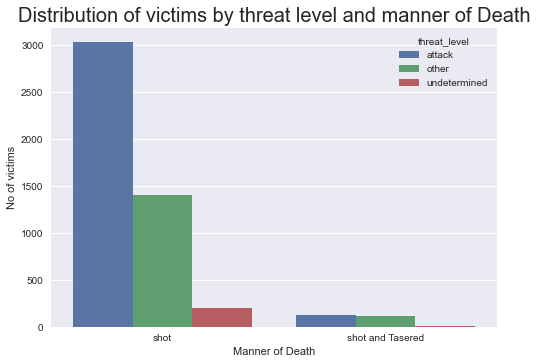

In [35]:

#Did the victims attack the Police?

sns.countplot(data=shooting,x="manner_of_death",hue='threat_level')
plt.xlabel('Manner of Death')
plt.ylabel('No of victims');
plt.title('Distribution of victims by threat level and manner of Death',fontsize = 20);


-Majority of the victims who were shot at first instance tried to launch an attack against arrest hence, the shot. That is why majority were not running away, they attacked

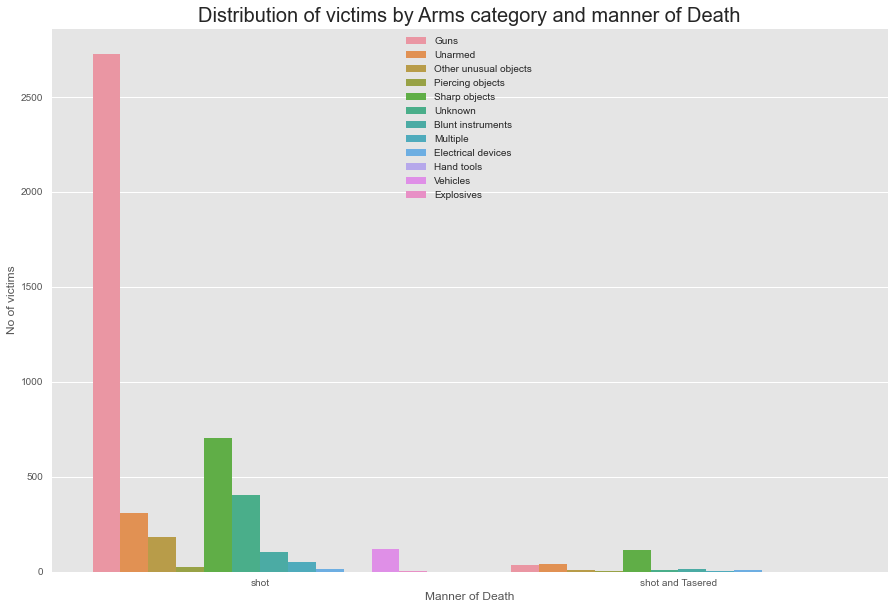

In [36]:
#Did possesion of a certain kind of weapon influence their death?
plt.style.use("ggplot")
plt.figure(figsize = (15,10))

sns.countplot(data=shooting,x="manner_of_death",hue='arms_category')
plt.xlabel('Manner of Death')
plt.ylabel('No of victims');
plt.title('Distribution of victims by Arms category and manner of Death',fontsize = 20);
plt.legend();

-Majority of victims that were shot are first instance were armed and most of them had guns

## A number of victims where unarmed, what could have possibly influenced their death? What harm did they pose?
  

In [37]:
unarmed=shooting[shooting['armed']=='unarmed']
unarmed.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,age_groups,year,month,month_year
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,young adult,2015,1,2015-01
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed,young adult,2015,1,2015-01
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.0,M,Black,Strong,AR,False,attack,Not fleeing,False,Unarmed,young adult,2015,1,2015-01
61,352,Joshua Omar Garcia,2015-01-26,shot,unarmed,24.0,M,Hispanic,Tahoka,TX,False,other,Car,False,Unarmed,young adult,2015,1,2015-01
71,342,Ralph Willis,2015-01-29,shot,unarmed,42.0,M,White,Stillwater,OK,False,other,Foot,False,Unarmed,middleaged,2015,1,2015-01


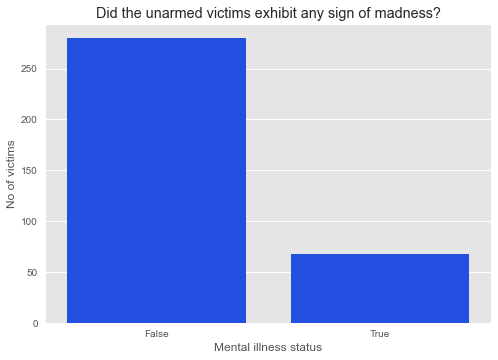

In [38]:
#Are the  unarmed victims mad?

sns.countplot(unarmed["signs_of_mental_illness"],color=color, order=unarmed["signs_of_mental_illness"].value_counts().index);
plt.ylabel('No of victims')
plt.xlabel('Mental illness status');
plt.title('Did the unarmed victims exhibit any sign of madness?');

- Few unarmed victims showed signs of mental illness , the vast majority had sound mental health

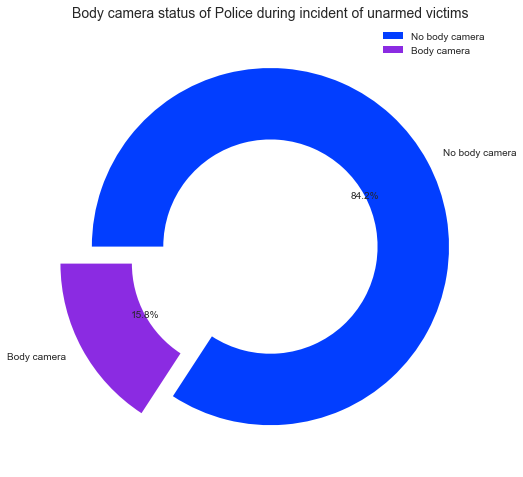

In [39]:
#Did the Police have their body camera off for unarmed victims?


plt.style.use("ggplot")
plt.figure(figsize=(8,12))
color=[sns.color_palette("bright")[0],sns.color_palette("bright")[4]]

explode = [0, 0.2]


plt.pie(unarmed["body_camera"].value_counts(),labels=['No body camera','Body camera'], startangle=180,counterclock =False, explode = explode, wedgeprops = {'width' : 0.4},autopct='%1.1f%%',colors=color);

plt.title('Body camera status of Police during incident of unarmed victims',fontsize = 14);

plt.legend();


- 84.2 Percent of cases with victims withou arms, the polic had their body camera off

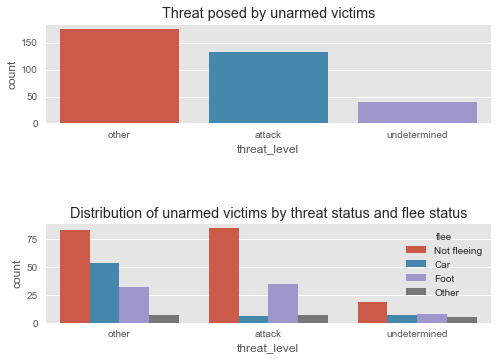

In [40]:
#Did unarmed victims try to attack or flee?

fig = plt.figure()
fig.subplots_adjust(hspace = 1, wspace=.3)
ax1=plt.subplot(2, 1, 1, title="Threat posed by unarmed victims",ylabel="No of unarmed victims",xlabel="Threat level")
ax2=plt.subplot(2, 1, 2,title="Distribution of unarmed victims by threat status and flee status",ylabel="No of unarmed victims",xlabel="Threat level")

sns.countplot(data=unarmed,x="threat_level",ax=ax1);
sns.countplot(data=unarmed,x="threat_level",hue='flee',ax=ax2);



## Conclusion
The Police killing is not a racial war against Black people, rather the killings were greatly influenced by the kind of weapons the victims were carrying , which invariably determines their threat  level. Majority of victims were males betwee the ages of 20 and 40 .